# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ inversible et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

# Réponses aux questions théoriques

1. Loi des grands nombres
2. Voir page 13 de proba IV pour la densité (flemme de recopier maintenant)
3. voir page 12 de proba V
4. Idem page 10, 11 et 12 de proba V

1.

2. On a un vecteur gaussien $Z = (Z(x_0), . . . , Z(x_n))$ d’espérance m et de matrice de covariance C supposée définie positive. Alors la densité conditionnelle de Z sachant $z = (z(x_{j_1}),..., z(x_{j_n}))$ s’écrit :

$f_{Z | z = (z(x_{j_1}),..., z(x_{j_n}))} (x) = \frac{1}{(2π)^\frac{k}{2} \sqrt{det(CS_Z)}} exp(-\frac{1}{2}(x - \psi((z(x_{j_1}),..., z(x_{j_n}))))^T C S^{-1}(x - \psi((z(x_{j_1}),..., z(x_{j_n})))) $.

Donc la variable aléatoire $Z | z = (z(x_{j_1}),..., z(x_{j_n}))$ est gaussienne d’espérance $m_{Z | z = (z(x_{j_1}),..., z(x_{j_n})))} = \psi(z) = m_Z + C_{Z, z} C^{-1} (z - m_z)$ et de matrice de covariance $CS_Z = C_Z − C_{Z, z} C_{z}^{-1}C_{z, Z}$ .

3.  Si $Y = (Y_1, . . . , Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, alors le vecteur $Z = m + RY$ (où R est une matrice p × p et m est un vecteur de taille p) est gaussien d’espérance $\mathbb{E}(Z) = \mathbb{E}((m + RY)) = m + R \ \mathbb{E}(Y) = m$ et de variance  $\mathbb{V}(Z) = \mathbb{E}((m + RY)(m + RY)^T)) = \mathbb{E}( RY(RY)^T) = R \ \mathbb{E}(Y(Y^T)) R^T = R C R^T = RR^T$ car ici $C = I_p$.

4.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [2]:
#Chargement de dépendances

import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [3]:
def c(h):
    return sigma2 * np.exp(-np.abs(h)/a)

2. Calculer la matrice de distance.

In [4]:
matrice_distance = np.array([[np.abs(i-j) for i in discretization] for j in discretization])

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [5]:
matrice_covariance = c(matrice_distance)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [6]:
cov_obs = matrice_covariance[observation_indexes][:,observation_indexes]
cov_obs_unknown = matrice_covariance[observation_indexes][:,unknown_indexes]
cov_unknown = matrice_covariance[unknown_indexes][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

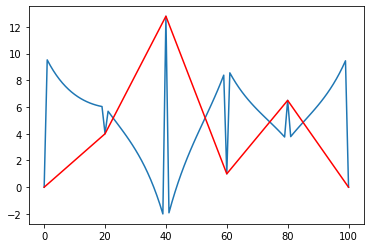

In [7]:
esp = np.array([mu]*N)
esp_cond = esp[unknown_indexes] -np.transpose(cov_obs_unknown).dot(np.linalg.inv(cov_obs)).dot(depth-esp[observation_indexes])

esp_concatene = []
j=0
for i in range(N):
    if i in observation_indexes:
        esp_concatene.append(depth[i//20])
    else :
        esp_concatene.append(esp_cond[j])
        j+=1
plt.plot(np.array(esp_concatene)*-1 )
plt.plot(observation_indexes, np.array(depth)*-1, 'r')

6. Calculer la matrice de covariance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

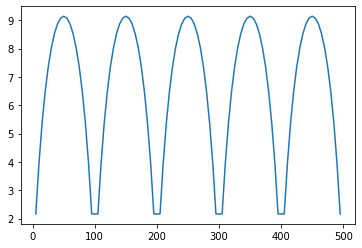

In [8]:
cov_cond = cov_unknown - np.transpose(cov_obs_unknown).dot(np.linalg.inv(cov_obs)).dot(cov_obs_unknown)
diag = [cov_cond[i, i] for i in range(95)]
plt.plot(np.array(unknown_indexes)*Delta, diag)

C'est bizarre...

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

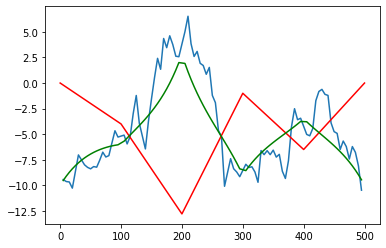

In [9]:
Y = np.random.normal(0,1, 95)
R = np.linalg.cholesky(cov_cond)
Z_cond = esp_cond + R.dot(Y)
plt.plot(np.array(unknown_indexes)*Delta, Z_cond)
plt.plot(np.array(observation_indexes)*Delta, depth, 'r')
plt.plot(np.array(unknown_indexes)*Delta, esp_cond,'g')

C'est encore étrange

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [10]:
def long_cable(Z, delta= Delta):
    l = 0
    for i in range(1, N):
        l+= np.sqrt(delta**2+ (Z[i]-Z[i-1])**2)
    return l       

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [11]:
long_est = 0
R = np.linalg.cholesky(cov_cond)
for i in range(100):
    Y = np.random.normal(0,1, 95)
    Z = 
    

SyntaxError: invalid syntax (<ipython-input-11-76af191d5500>, line 5)

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

11. Représenter l'histogramme des longueurs de câbles générées.

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.